In [3]:
!pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.1 MB 2.3 MB/s eta 0:02:44
   ---------------------------------------- 0.1/377.1 MB 1.4 MB/s eta 0:04:22
   ---------------------------------------- 0.3/377.1 MB 2.1 MB/s eta 0:02:57
   ---------------------------------------- 0.7/377.1 MB 3.2 MB/s eta 0:01:59
   ---------------------------------------- 0.8/377.1 MB 3.1 MB/s eta 0:02:02
   ---------------------------------------- 1.3/377.1 MB 4.4 MB/s eta 0:01:26
   ---------------------------------------- 2.0/377.1 MB 5.4 MB/s eta 0:01:09
   ---------------------------------------- 3.3/377.1 MB 7.8 MB/s eta 0:00:48
   ---------------------------------------- 4.7/377

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [5]:
train_dir = 'DATASET/TRAIN'
test_dir = 'DATASET/TEST' 

'A'

In [7]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [9]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (75,75),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (75,75),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(75, 75, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

C:\Users\himan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
# epochs = 50  
# batch_size = 16

In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 75, 75, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      21,234,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,610,629 (82.44 MB)

 Trainable params: 21,610,629 (82.44 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [19]:
Result=model.fit(
    train_generator,
    epochs=2,
    batch_size=16,
    verbose=1,
    validation_data=validation_generator
)

Epoch 1/2


C:\Users\himan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 7/55 ━━━━━━━━━━━━━━━━━━━━ 1:44 2s/step - accuracy: 0.2390 - loss: 3.1447

C:\Users\himan\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.2265 - loss: 2.0957 - val_accuracy: 0.2500 - val_loss: 1.6021
Epoch 2/2
55/55 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.2205 - loss: 1.6043 - val_accuracy: 0.2500 - val_loss: 1.5930


In [20]:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(75, 75),
    color_mode='rgb',
    class_mode='categorical',  
    batch_size=16,
    subset=None 
)




Found 470 images belonging to 5 classes.


In [23]:
IMAGE_SIZE=256
BATCH_SIZE=16
tr_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "DATASET/TRAIN",
    shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE
)


te_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "DATASET/TEST",
    shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE
)

Found 1081 files belonging to 5 classes.
Found 470 files belonging to 5 classes.


In [25]:
class_name=tr_dataset.class_names
class_name

['downdog', 'goddess', 'plank', 'tree', 'warrior2']

First image to predict


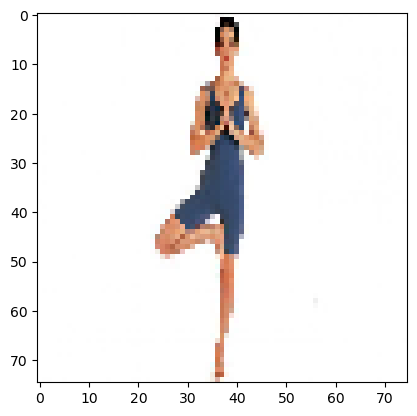

Actual label: tree
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Predicted label: plank
First image to predict


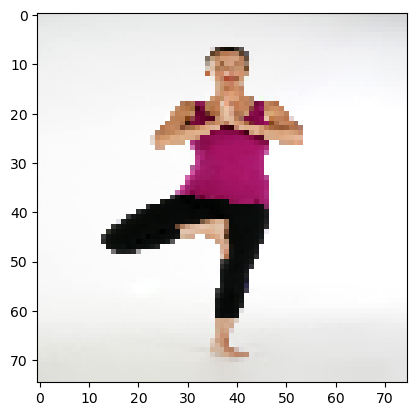

Actual label: tree
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
Predicted label: plank
First image to predict


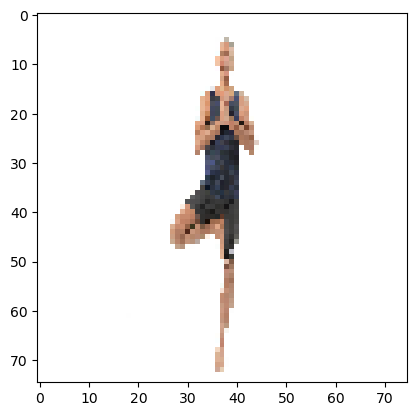

Actual label: tree
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted label: plank
First image to predict


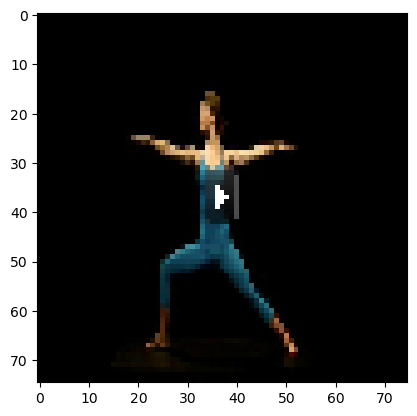

Actual label: warrior2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
Predicted label: plank
First image to predict


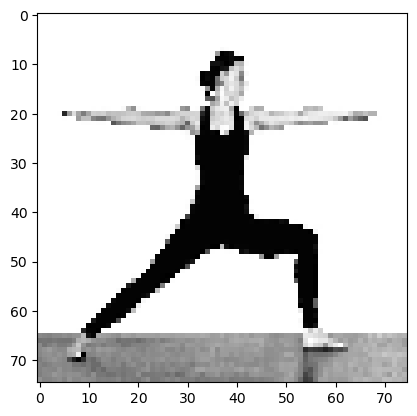

Actual label: warrior2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predicted label: plank
First image to predict


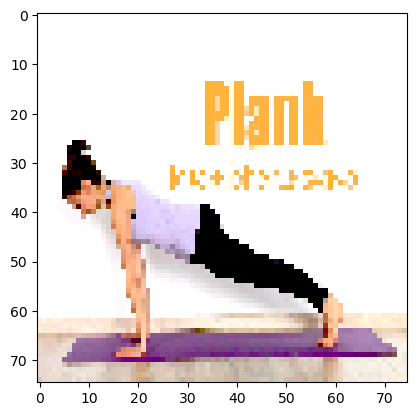

Actual label: plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Predicted label: plank
First image to predict


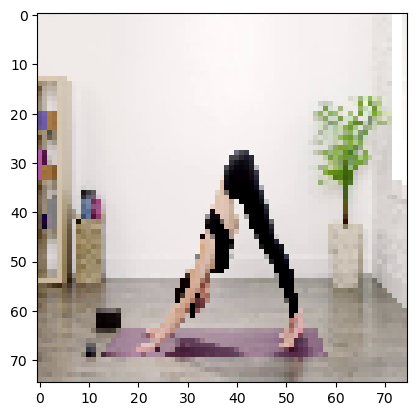

Actual label: downdog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted label: plank
First image to predict


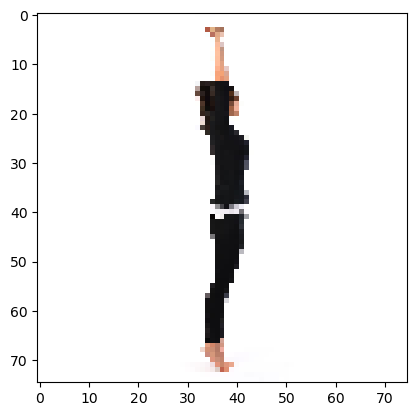

Actual label: tree
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted label: plank


In [27]:
num_images=0
for data_batch, labels_batch in test_generator:
    first_image = (data_batch[0]*255).astype('uint8')
    first_label = labels_batch[0]

    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    print("Actual label:", class_name[np.argmax(first_label)])

    batch_prediction = model.predict(data_batch)
    print("Predicted label:", class_name[np.argmax(batch_prediction[0])])
    num_images += 1
    if num_images >= 8:
            break


In [37]:

import tensorflow as tf
import numpy as np

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Creating a batch with a single image

    predictions = model.predict(img_array)
    print(str(predictions))
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    
    
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.21065637 0.16483398 0.23724258 0.16918175 0.21808533]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.21779151 0.15189989 0.24792612 0.15954831 0.22283414]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.2112586  0.15883723 0.23888758 0.16776757 0.22324905]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.21261811 0.1595374  0.24041198 0.16698508 0.2204474 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.21099678 0.16041242 0.23965977 0.16657889 0.22235212]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.20974271 0.16586745 0.23627496 0.17024218 0.21787274]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.21095277 0.16217592 0.23780641 0.1691701  0.21989481]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.2095482  0.16408221 0.23783301 0.16948457 0.21905203]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.20959918 0.16824068 0.23455563 0.17087281 0.21673168]]


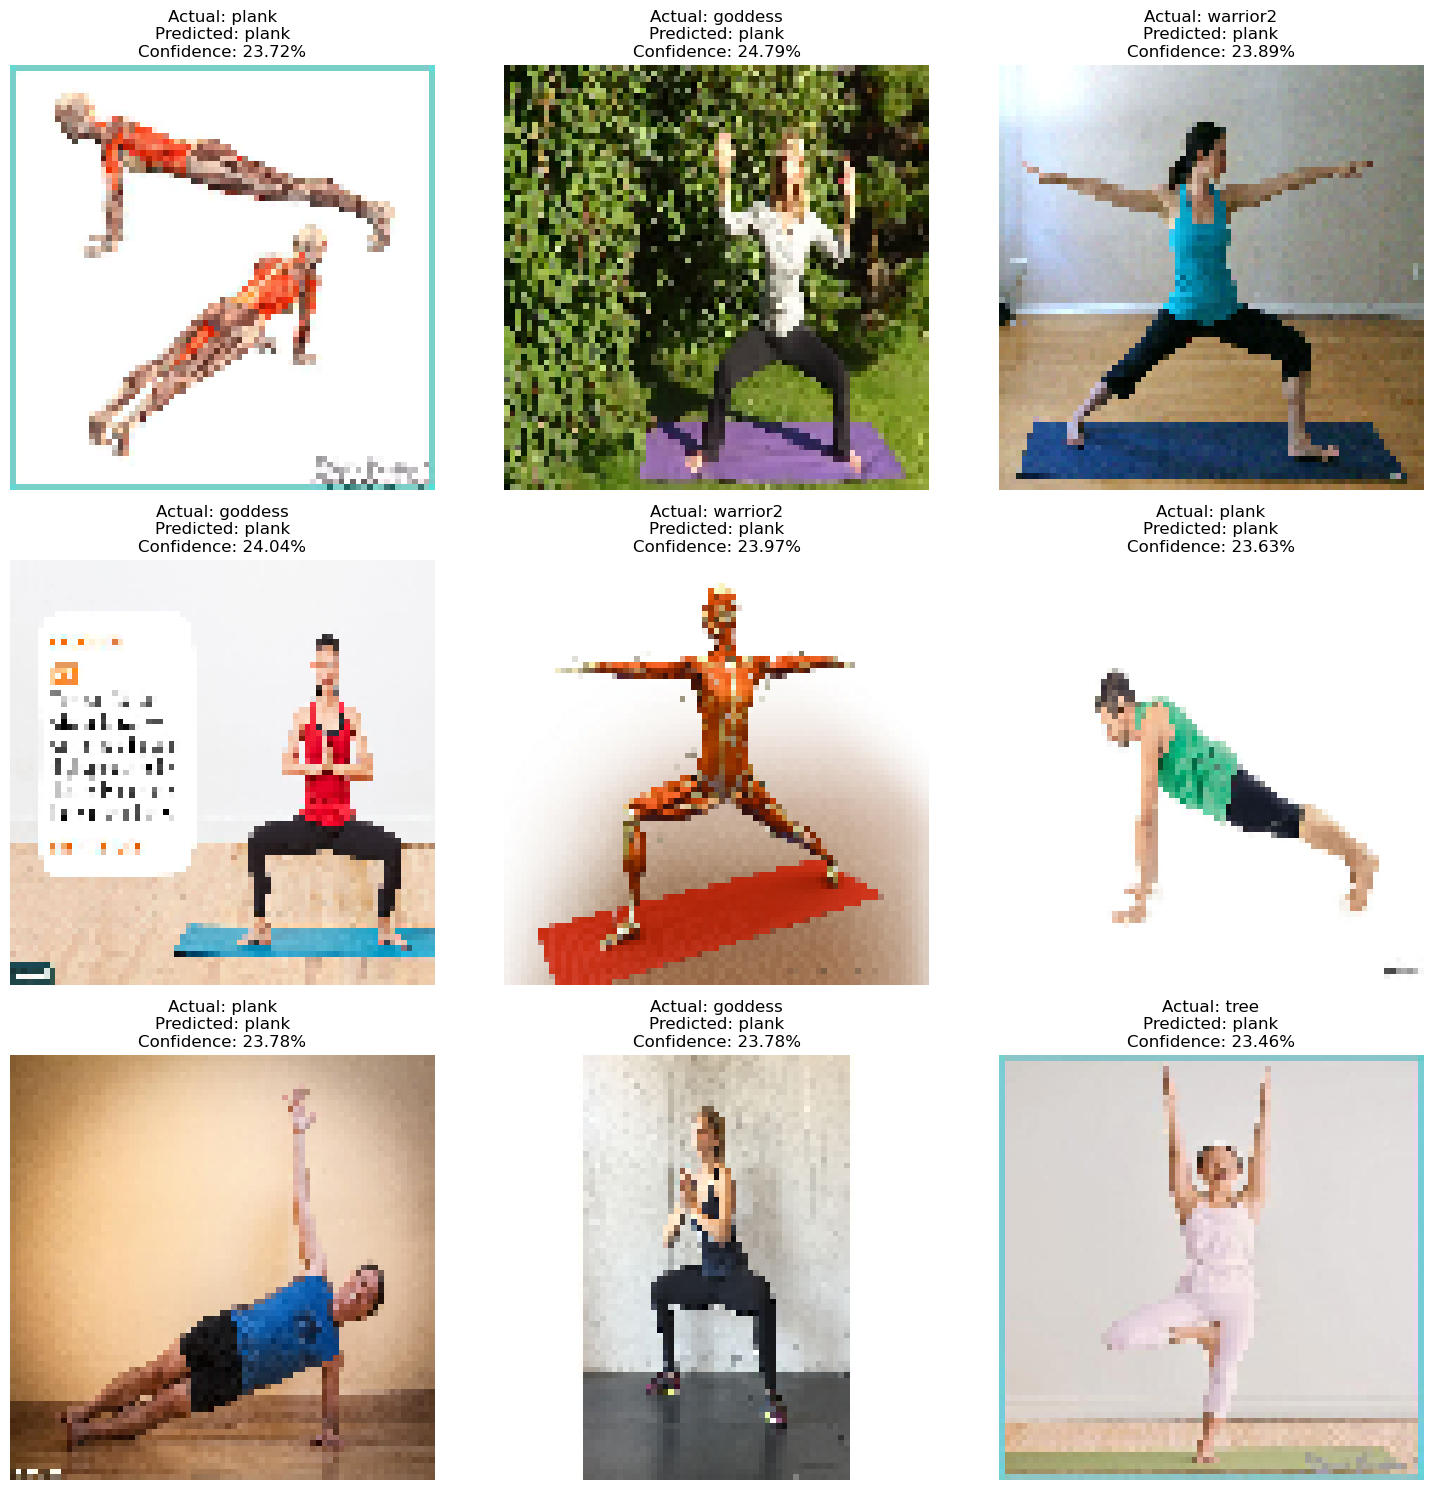

In [39]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

# Iterate over the generator to get batches of test data
for batch_images, batch_labels in test_generator:
    for i in range(min(batch_images.shape[0], 9)):  # Limit to 9 images per batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow((batch_images[i] * 255).astype('uint8'))
        
        # Assuming predict function returns predicted_class and confidence
        predicted_class, confidence = predict(model, batch_images[i])
        actual_class = class_name[np.argmax(batch_labels[i])]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off")
        
    break  # Stop after the first batch to show only 9 images

plt.tight_layout()
plt.show()


In [68]:
model_version=1
model.save(f"Model_1/{model_version}")

INFO:tensorflow:Assets written to: Model_1/1\assets


INFO:tensorflow:Assets written to: Model_1/1\assets
